# Dimensionality Reduction with PCA and clustering cmparison using Julia 
We load the packages that we will use

In [12]:
using MultivariateStats, Plots, Random, VegaDatasets, DataFrames
using StatsBase, Clustering
using Statistics

Loading the dataset and handling the missing values

In [13]:
DF = DataFrame(VegaDatasets.dataset("cars"))
dropmissing!(DF)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64,Int64,Float64,Int64
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


Exploring the data to identify the features that we will use

In [14]:
names(DF)
@show describe(DF)
DF[1,2:end]

describe(DF) = 9×7 DataFrame
 Row │ variable          mean     min                      median  max               nmissing  eltype
     │ Symbol            Union…   Any                      Union…  Any               Int64     DataType
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Name                       amc ambassador brougham          vw rabbit custom         0  String
   2 │ Miles_per_Gallon  23.4459  9.0                      22.75   46.6                     0  Float64
   3 │ Cylinders         5.47194  3                        4.0     8                        0  Int64
   4 │ Displacement      194.412  68.0                     151.0   455.0                    0  Float64
   5 │ Horsepower        104.469  46                       93.5    230                      0  Int64
   6 │ Weight_in_lbs     2977.58  1613                     2803.5  5140                     0  Int64
   7 │ Acceleration      15.5413  8.0            

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
,Float64,Int64,Float64,Int64,Int64,Float64
1,18.0,8,307.0,130,3504,12.0


Preprocessing the data to fit into the model and collecting the Tags to group after the fit

In [24]:
X = Matrix(DF[!,2:7])
y = Vector{String}(DF.Origin)
Origin = reshape(unique(DF.Origin), (1,3))
# center and normalize the data
data = X
data = (data .- mean(data,dims = 1))./ std(data,dims=1)#transforms data to mean zero PCA

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
  ⋮                                                       ⋮
 -0.185255   0.309571   0.359199   0.195645  -0.167864   -0.304954
  1.09597   -0.862911  -0.481748  -0.220035  -0.368005   -0.594928
  1.60847   -0.862911  -0.567753  -0.531795  -0.715308   -0.92115
  0.455359  -0.862911  -0.414854  -0.375915  -0.0324748  

Fit the preproccesed data into the PCA model

In [17]:
model = fit(PCA,data',maxoutdim=3)

PCA(indim = 6, outdim = 3, principalratio = 0.9625607644667086)

Pattern matrix (unstandardized loadings):
──────────────────────────────────
         PC1        PC2        PC3
──────────────────────────────────
1  -0.873037  -0.20899   0.43321
2   0.942277   0.126601  0.203523
3   0.97054    0.092613  0.151251
4   0.94995   -0.141833  0.0114899
5   0.941156   0.244211  0.0633985
6  -0.638795   0.761967  0.0484404
──────────────────────────────────

Importance of components:
────────────────────────────────────────────────────────
                                PC1       PC2        PC3
────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.78827   0.728631  0.258467
Variance explained         0.798044  0.121439  0.0430779
Cumulative variance        0.798044  0.919483  0.962561
Proportion explained       0.829085  0.126162  0.0447534
Cumulative proportion      0.829085  0.955247  1.0
────────────────────────────────────────────────────────

In [25]:
# Transposing raw data to handle it better
data_t = data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

We obtain the princupal components from the model, and asign them to some vectors

In [19]:
X_transform = MultivariateStats.transform(model, data_t)

PC1 = X_transform[1, :]

PC2 = X_transform[2, :]

PC3 = X_transform[3, :];

Plotting the results with their corresponding tags

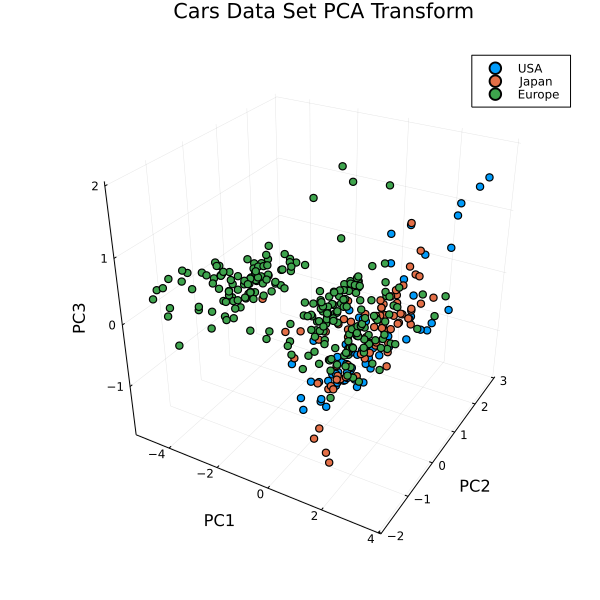

In [27]:
gr(size=(600,600))
p_transform = scatter(PC1, PC2, PC3,
    xlabel = "PC1", ylabel = "PC2", zlabel = "PC3",
    title = "Cars Data Set PCA Transform",
    markersize = 4,
    group = y,
    label = Origin
)

In [29]:
# Let's make a coparison using K-means clustering method using the processed data
# We initialize some variables
k = 3;
itr = 100;
########################################
result = kmeans(data_t, k; maxiter=itr, display=:iter)
a = assignments(result)
@show c = counts(result)
# Centroids of the clusters
mu = result.centers;

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       8.874474e+02
      1       5.998196e+02      -2.876277e+02 |        3
      2       5.952959e+02      -4.523774e+00 |        2
      3       5.950030e+02      -2.928787e-01 |        0
      4       5.950030e+02       0.000000e+00 |        0
K-means converged with 4 iterations (objv = 595.0029897778061)
c = counts(result) = [97, 202, 93]


Plotting the results of clustering the processed data

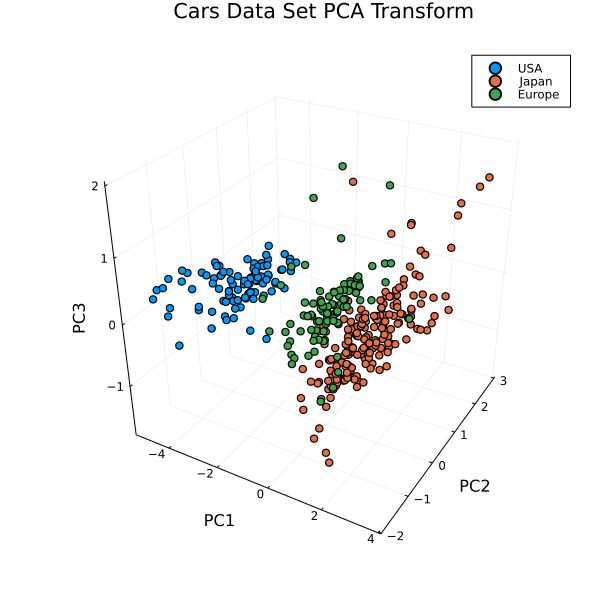

In [31]:

p_transform = scatter(PC1, PC2, PC3,
    xlabel = "PC1", ylabel = "PC2", zlabel = "PC3",
    title = "Cars Data Set PCA Transform",
    markersize = 4,
    group = a,
    label = Origin
)

In [38]:
using MLBase

LabelMap = labelmap(y)
y1 = labelencode(LabelMap, y)
# checking accuracy of clustering
mean(a.==y1)

0.45663265306122447